# REGRESSION ON BOSTON HOUSING DATASET USING HAMMEROFLIGHT


In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('d:\\d\\boston_housing.csv', header=None, delim_whitespace=True)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Data Description
##### crim: per capita crime rate by town.
##### zn: proportion of residential land zoned for lots over 25,000 sq.ft.
##### indus: proportion of non-retail business acres per town.
##### chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
##### nox: nitrogen oxides concentration (parts per 10 million).
##### rm: average number of rooms per dwelling.
##### age: proportion of owner-occupied units built prior to 1940.
##### dis: weighted mean of distances to five Boston employment centres.
##### rad: index of accessibility to radial highways.
##### tax: full-value property-tax rate per 10,000.
##### ptratio: pupil-teacher ratio by town.
##### black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
##### lstat: lower status of the population (percent).
##### medv: median value of owner-occupied homes in $1000s

In [4]:
from hammeroflight.arufunctions import qualityreport

In [5]:
qualityreport(df)

Categorical Features: 0 | Numerical Features: 14             
Dataset Shape: (506, 14)  | Integrity : 100.0 %


,Rows,Missing,Missing%,Mean-Mode,Unique,Dtype
CRIM,506,0,0.0,3.613524,504,float64
ZN,506,0,0.0,11.363636,26,float64
INDUS,506,0,0.0,11.136779,76,float64
CHAS,506,0,0.0,0.069170,2,int64
NOX,506,0,0.0,0.554695,81,float64
RM,506,0,0.0,6.284634,446,float64
AGE,506,0,0.0,68.574901,356,float64
DIS,506,0,0.0,3.795043,412,float64
RAD,506,0,0.0,9.549407,9,int64
TAX,506,0,0.0,408.237154,66,float64


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Exploratory Data Analysis via Visualization

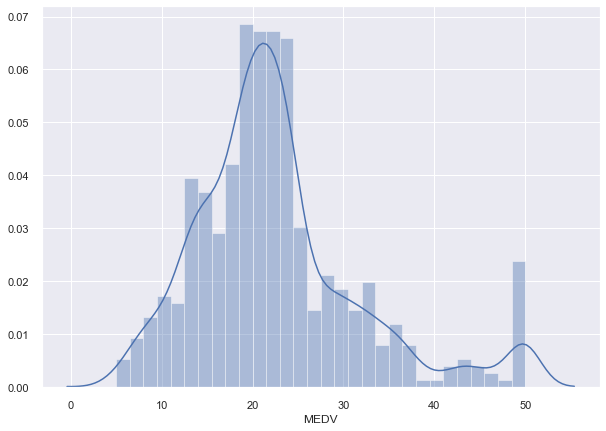

In [7]:
fig = plt.figure(figsize=(10,7))
sns.distplot(df.MEDV, bins=30)

#### The MEDV (prices x1000 USD) is mostly a normal distribution with a few outliers. Let's now find the correlation of each of the variables with one another using heatmap.

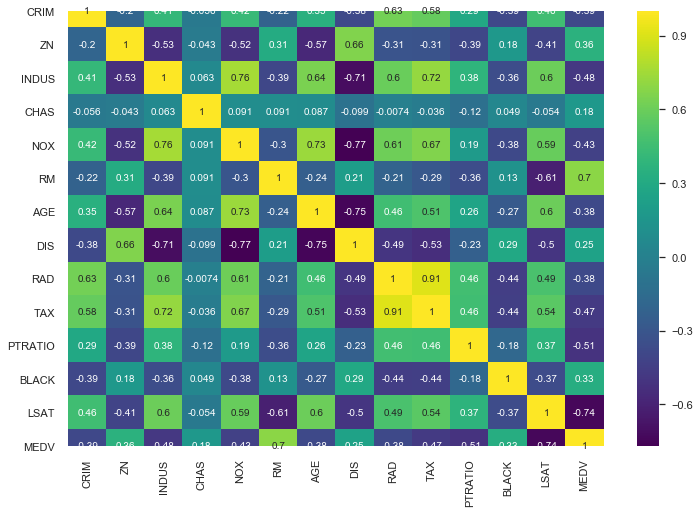

In [8]:
corr_table = df.corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_table, cmap='viridis', annot=True)

#### To fit a Linear Regression model,  we see that LSAT is highly negative-correlated to prices of houses (MEDV) and RM has a high positive-correlation with MEDV. This translates to as RM increases, MEDV increases, and as LSAT increases, MEDV decreases.



#### An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

#### Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.


(<matplotlib.legend.Legend at 0x1b30c2b4f98>,
 <matplotlib.legend.Legend at 0x1b30c2c6a90>)

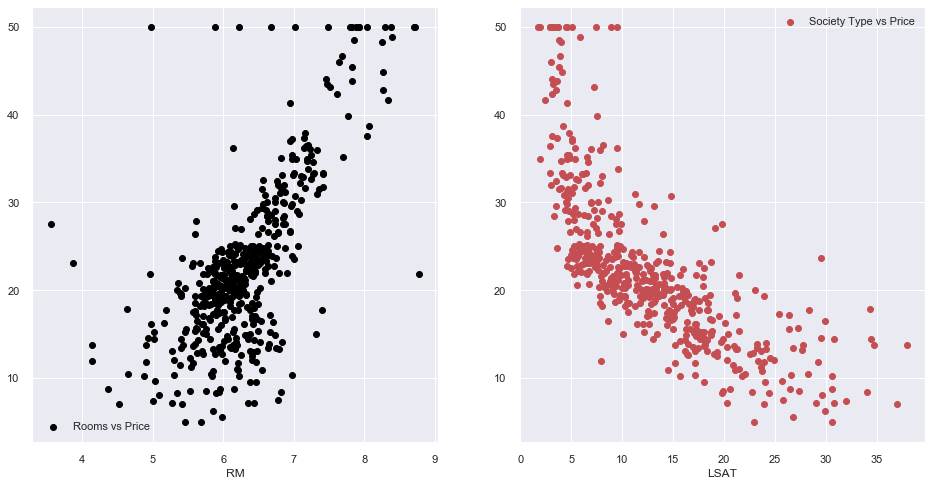

In [9]:
x1 = np.asarray(df['RM']).reshape(-1,1)
x2 = np.asarray(df['LSAT']).reshape(-1,1)
y = np.asarray(df.MEDV).reshape(-1,1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax1.scatter(x1, y, label='Rooms vs Price', color='black')
ax1.set_xlabel('RM')
ax2.scatter(x2, y, label='Society Type vs Price', color='r')
ax2.set_xlabel('LSAT')
ax1.legend(), ax2.legend()

#### The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
#### The prices tend to decrease with an increase in LSAT. Though it doesn’t look to be following exactly a linear line.

#### TRAINING THE MODEL

In [10]:
X = df[['LSAT', 'RM']]
y = df['MEDV']

In [11]:
X.shape, y.shape

((506, 2), (506,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#### Here we choose LSAT and RM as predictor features and MEDV as target.

#### IMPORT HAMMEROFLIGHT 

In [13]:
from hammeroflight.modelcomparator import reg_comparator
from hammeroflight.arufunctions import fit_regress, r_plot

C:\Users\void_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\void_\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,LinReg,D-Tree,R-Forest,XGBoost,LGBM,KNN
Scores,,,,,,
Training Score,0.641401,1.00000,0.952552,0.910335,0.888643,0.839217
Test Scores,0.625071,0.53324,0.678577,0.710684,0.737306,0.725607
RMSE,5.765800,6.43320,5.338500,5.064900,4.826200,4.932500


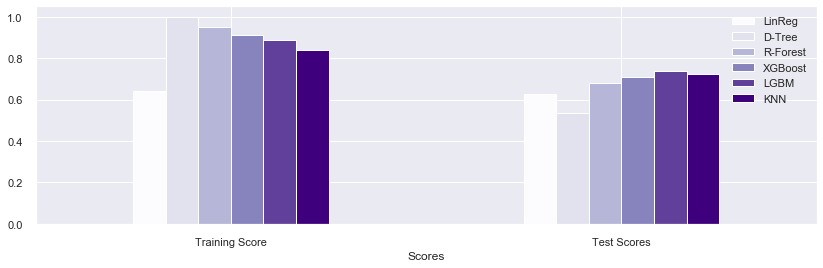

In [15]:
reg_comparator(X_train, X_test, y_train, y_test)

#### We see that the Decision Tree is heavily overfitting our model. So we go with the one  with best fit - Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
fit_regress(lr, X_train, X_test, y_train, y_test)


Predictions stored in global variable "pred".


,Score
Training Score,64.1401
Test Score,62.5071
RMSE,5.76576
Fit,Good Fit


#### We get a good fit with the Linear Regression Model. Let's use the r_plot to see our regression on LSAT and RM.

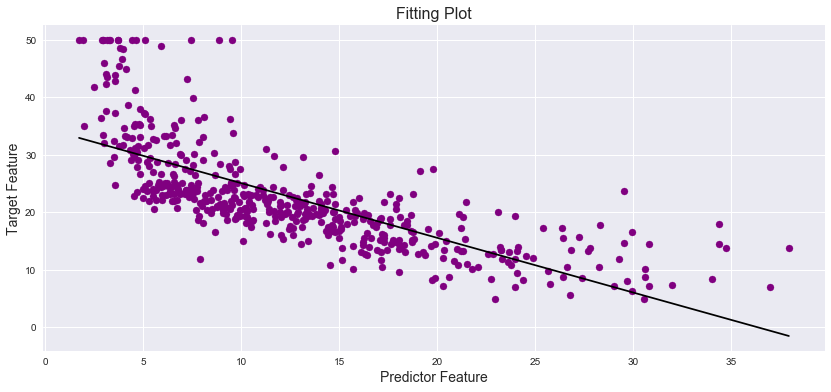

In [20]:
A = df['LSAT']
B = df['RM']
C = df['MEDV']
r_plot(lr, A, C)

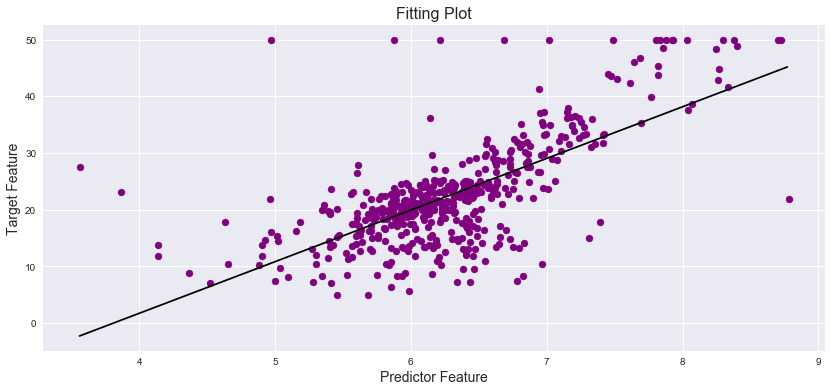

In [22]:
r_plot(lr, B, C)